In [1]:
import os
import sys
import json

import matplotlib.pyplot as plt

from math import *

# Add root folder of the project in sys.path
module_path = os.path.abspath(os.path.join('..'))  # Up on one level higher 
if module_path not in sys.path:
    sys.path.append(module_path)

from plot_results import PrepareData, Calculations, PlotResults

In [2]:
# Create a list with of amounts of data for all experiments
data_amounts = [0, 1000, 2000, 3000, 4000, 5000, 10000, 15000, 17379]

# Create class instances
prepData = PrepareData()
calc = Calculations()
plot = PlotResults()

## Experiment 6 - MLP, 4 hidden layers

In [3]:
# Define global variabels fror the first experiment
base_path_exp6 = "/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/bike_dataset/bike_output/exp_6(1)/weights_graphs_mlp"
layers_num_exp6 = 4

In [4]:
barcode_layers_exp6 = prepData.load_barcode_data(amounts=data_amounts, base_path=base_path_exp6)

### Mean lifetime

In [6]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_homologies_ml_exp6 = list()

# Fill in created list
for i in range(layers_num_exp6):
    h_layer = list()
    for batch in data_amounts:
        h_layer.append(calc.calculate_homology_mean_lifetime(barcode_layers_exp6[batch][i]))
    layers_homologies_ml_exp6.append(h_layer)

# plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_homologies_ml_exp6, label='Mean lifetime', layers_num=layers_num_exp6)

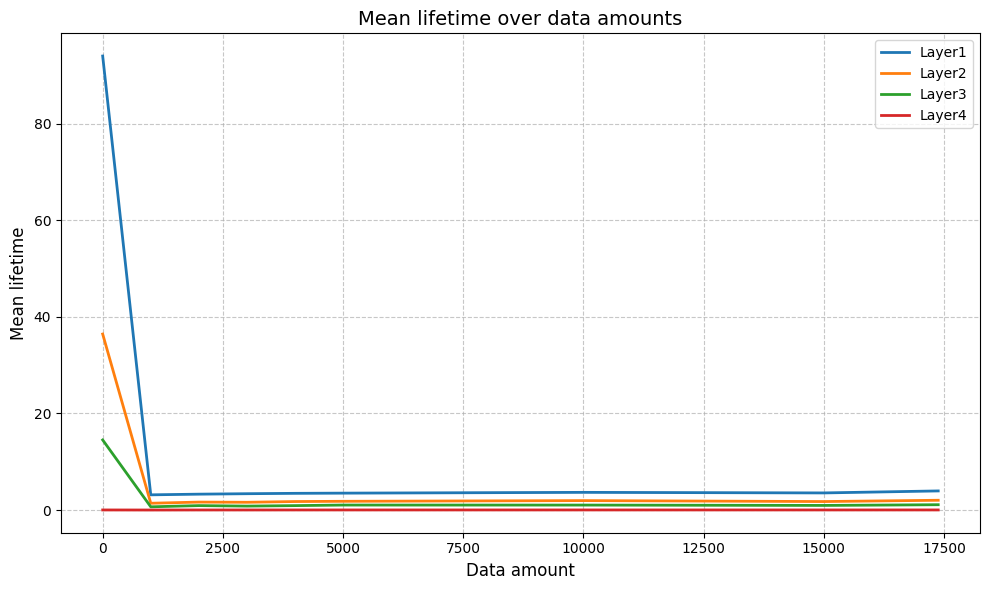

In [7]:
# Data preparation
plt.figure(figsize=(10, 6))
plt.plot(data_amounts, layers_homologies_ml_exp6[0], markersize=8, linewidth=2, label='Layer1')
plt.plot(data_amounts, layers_homologies_ml_exp6[1], markersize=8, linewidth=2, label='Layer2')
plt.plot(data_amounts, layers_homologies_ml_exp6[2], markersize=8, linewidth=2, label='Layer3')
plt.plot(data_amounts, layers_homologies_ml_exp6[3], markersize=8, linewidth=2, label='Layer4')
plt.xlabel('Data amount', fontsize=12)
plt.ylabel('Mean lifetime', fontsize=12)
plt.title('Mean lifetime over data amounts', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

### Norm persist entropy

In [8]:
# Create a list to store mean lifetimes per layers and per data amounts
layers_norm_entropy_exp6 = list()

# Fill in created list
for q in range(layers_num_exp6):
    layer_norm_ent = list()
    for batch in data_amounts:
        layer_norm_ent.append(calc.calculate_norm_persist_entropy(barcode_layers_exp6[batch][q]))
    layers_norm_entropy_exp6.append(layer_norm_ent)

# plot.plot_graphs_grid(data_amounts=data_amounts, layers=layers_norm_entropy_exp6, label='Norm entropy', layers_num=layers_num_exp6)

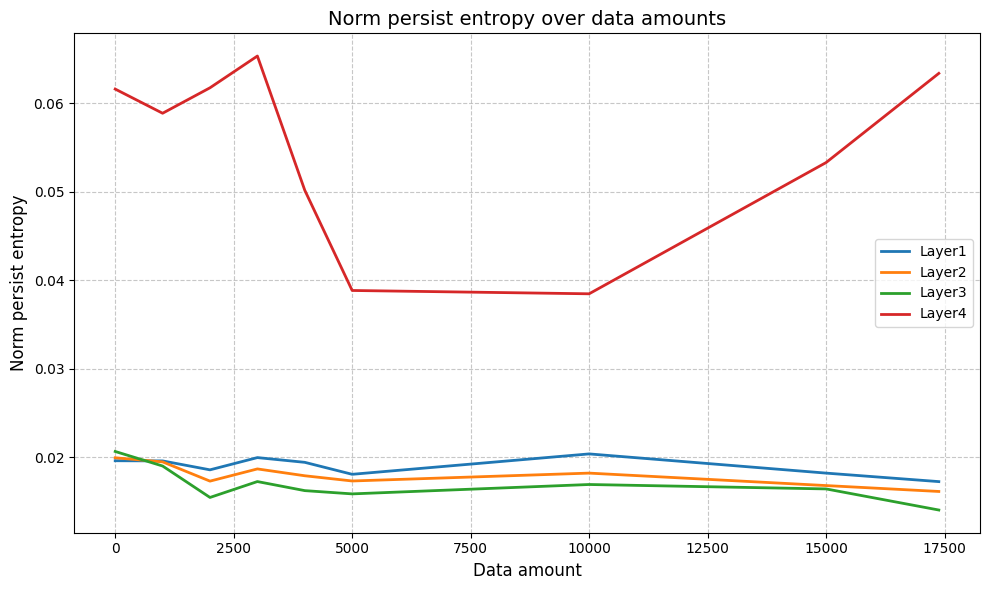

In [9]:
# Data preparation
plt.figure(figsize=(10, 6))
plt.plot(data_amounts, layers_norm_entropy_exp6[0], markersize=8, linewidth=2, label='Layer1')
plt.plot(data_amounts, layers_norm_entropy_exp6[1], markersize=8, linewidth=2, label='Layer2')
plt.plot(data_amounts, layers_norm_entropy_exp6[2], markersize=8, linewidth=2, label='Layer3')
plt.plot(data_amounts, layers_norm_entropy_exp6[3], markersize=8, linewidth=2, label='Layer4')
plt.xlabel('Data amount', fontsize=12)
plt.ylabel('Norm persist entropy', fontsize=12)
plt.title('Norm persist entropy over data amounts', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [10]:
exp6_1_mse = dict()
exp6_2_mse = dict()
exp6_3_mse = dict()
exp6_4_mse = dict()
exp6_5_mse = dict()

for i in range(1, 6):
    base_path_losses = f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/bike_dataset/bike_output/exp_6({i})/weights_graphs_mlp"
    data_amounts_new = data_amounts[1:]
    for data in data_amounts_new:
        with open(base_path_losses+'_DataAmount'+str(data)+'/barcodes/mse_test.json', 'rt', encoding='utf-8') as file:
            mse = json.load(file)
            
        if i==1:
            exp6_1_mse.setdefault(data, mse['epoch30'])
        elif i==2:
            exp6_2_mse.setdefault(data, mse['epoch30'])
        elif i==3:
            exp6_3_mse.setdefault(data, mse['epoch30'])
        elif i==4:
            exp6_4_mse.setdefault(data, mse['epoch30'])
        elif i==5:
            exp6_5_mse.setdefault(data, mse['epoch30'])

In [11]:
total_mse = dict()

for data in data_amounts[1:]:
    total_mse[data] = (exp6_1_mse[data] + exp6_2_mse[data] + exp6_3_mse[data] + exp6_4_mse[data] + exp6_5_mse[data]) / 5

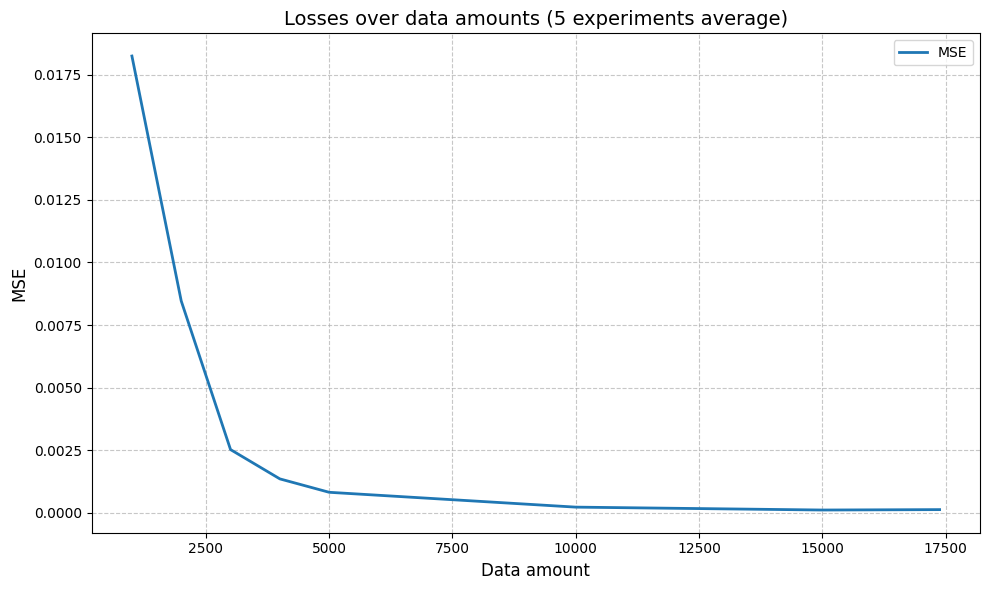

In [12]:
# Data preparation
mse_x = list(total_mse.keys())
mse_y = list(total_mse.values())

plt.figure(figsize=(10, 6))
plt.plot(mse_x, mse_y, markersize=8, linewidth=2, label='MSE')
plt.xlabel('Data amount', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Losses over data amounts (5 experiments average)', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [13]:
exp6_1_smape = dict()
exp6_2_smape = dict()
exp6_3_smape = dict()
exp6_4_smape = dict()
exp6_5_smape = dict()

for i in range(1, 6):
    base_path_losses = f"/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/bike_dataset/bike_output/exp_6({i})/weights_graphs_mlp"
    data_amounts_new = data_amounts[1:]
    for data in data_amounts_new:
        with open(base_path_losses+'_DataAmount'+str(data)+'/barcodes/smape_test_data.json', 'rt', encoding='utf-8') as file:
            smape = json.load(file)
            
        if i==1:
            exp6_1_smape.setdefault(data, smape['epoch30'])
        elif i==2:
            exp6_2_smape.setdefault(data, smape['epoch30'])
        elif i==3:
            exp6_3_smape.setdefault(data, smape['epoch30'])
        elif i==4:
            exp6_4_smape.setdefault(data, smape['epoch30'])
        elif i==5:
            exp6_5_smape.setdefault(data, smape['epoch30'])

In [14]:
total_smape = dict()

for data in data_amounts[1:]:
    total_smape[data] = (exp6_1_smape[data] + exp6_2_smape[data] + exp6_3_smape[data] + exp6_4_smape[data] + exp6_5_smape[data]) / 5

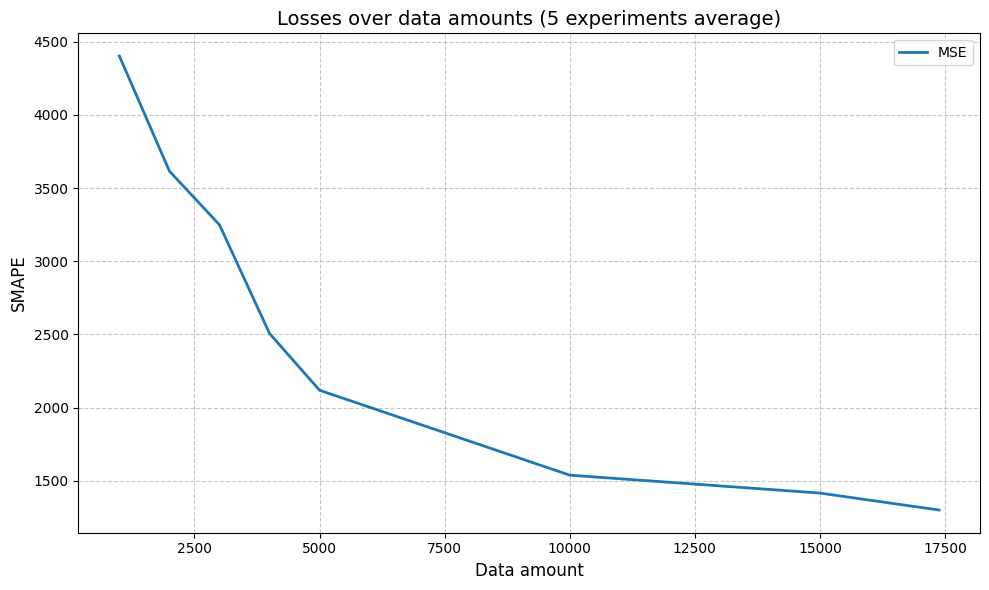

In [15]:
# Data preparation
mse_x = list(total_smape.keys())
mse_y = list(total_smape.values())

plt.figure(figsize=(10, 6))
plt.plot(mse_x, mse_y, markersize=8, linewidth=2, label='MSE')
plt.xlabel('Data amount', fontsize=12)
plt.ylabel('SMAPE', fontsize=12)
plt.title('Losses over data amounts (5 experiments average)', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
data_calculations = [1000, 4000, 17379]

homology_mt_min = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_exp6[data_calculations[0]][0])
homology_mt_ave = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_exp6[data_calculations[1]][0])
homology_mt_max = calc.calculate_homology_mean_lifetime_per_epochs(barcode_layers_exp6[data_calculations[2]][0])

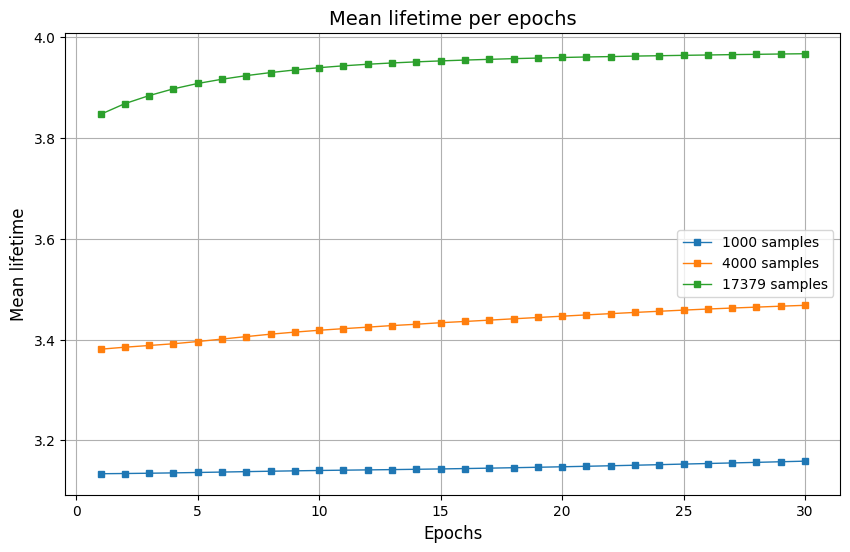

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(list(homology_mt_min.keys()), list(homology_mt_min.values()), label=f'{data_calculations[0]} samples', marker='s', markersize=5, linewidth=1)
plt.plot(list(homology_mt_ave.keys()), list(homology_mt_ave.values()), label=f'{data_calculations[1]} samples', marker='s', markersize=5,linewidth=1)
plt.plot(list(homology_mt_max.keys()), list(homology_mt_max.values()), label=f'{data_calculations[2]} samples', marker='s', markersize=5,linewidth=1)
plt.title('Mean lifetime per epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Mean lifetime', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

In [18]:
norm_ent_min = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_exp6[data_calculations[0]][0])
norm_ent_ave = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_exp6[data_calculations[1]][0])
norm_ent_max = calc.calculate_norm_persist_entropy_per_epochs(barcode_layers_exp6[data_calculations[2]][0])

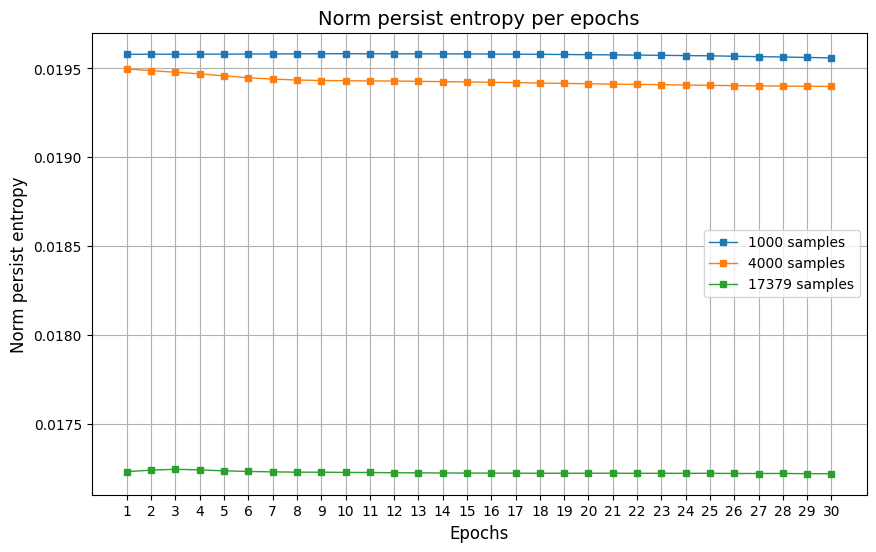

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(list(norm_ent_min.keys()), list(norm_ent_min.values()), label=f'{data_calculations[0]} samples', marker='s', markersize=5, linewidth=1)
plt.plot(list(norm_ent_ave.keys()), list(norm_ent_ave.values()), label=f'{data_calculations[1]} samples', marker='s', markersize=5,linewidth=1)
plt.plot(list(norm_ent_max.keys()), list(norm_ent_max.values()), label=f'{data_calculations[2]} samples', marker='s', markersize=5,linewidth=1)
plt.title('Norm persist entropy per epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Norm persist entropy', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.show()